# <span style="color: orange"> Librerias </span>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from wordcloud import WordCloud
from collections import Counter

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chrismerida/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chrismerida/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# <span style="color: orange"> Dataset </span>

In [3]:
df = pd.read_csv("tw_source.csv", header=None, delimiter=",", quotechar='"', encoding='ISO-8859-1')
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# <span style="color: orange"> Usuarios Más Populares </span>

In [4]:
estructura_user = r"^@\w+"

def extraer_user(texto):
    return re.findall(estructura_user, str(texto))

In [5]:
df['user_extraido'] = df[5].apply(extraer_user)

In [6]:
print(df[['user_extraido']].head())

        user_extraido
0       [@switchfoot]
1                  []
2         [@Kenichan]
3                  []
4  [@nationwideclass]


In [7]:
users_expandido = df['user_extraido'].explode()

In [8]:
users_expandido = users_expandido.dropna()

In [9]:
cont_user = users_expandido.value_counts()

In [10]:
users_populares = cont_user.head(3)
print(users_populares)

user_extraido
@mileycyrus    3824
@tommcfly      3631
@ddlovato      2954
Name: count, dtype: int64


# <span style="color: orange"> Corpus </span>

In [11]:
users_populares = cont_user.head(3).index

In [12]:
corpus_users = {}

In [13]:
for user in users_populares:
    tweets_user = df[df['user_extraido'].apply(lambda x: user in x if x else False)]

    tweets_user['Length'] = tweets_user[5].apply(lambda x: len(str(x)))

    corpus = pd.DataFrame({
        'ID': tweets_user[1], 
        'Timestamp': tweets_user[2], 
        'Length': tweets_user['Length'], 
        'Contenido': tweets_user[5] 
    })

    corpus_users[user] = corpus

/var/folders/1_/06zplv050hq3hwkfjzjzpvx00000gn/T/ipykernel_26422/639737494.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_user['Length'] = tweets_user[5].apply(lambda x: len(str(x)))
/var/folders/1_/06zplv050hq3hwkfjzjzpvx00000gn/T/ipykernel_26422/639737494.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_user['Length'] = tweets_user[5].apply(lambda x: len(str(x)))
/var/folders/1_/06zplv050hq3hwkfjzjzpvx00000gn/T/ipykernel_26422/639737494.py:4: SettingWithCopyWarning: 
A value is tryin

In [14]:
corpus_mileycyrus = corpus_users['@mileycyrus']
print(f"Corpus del usuario: @mileycyrus")
corpus_mileycyrus.head()

Corpus del usuario: @mileycyrus


,ID,Timestamp,Length,Contenido
1021,1468063101,Mon Apr 06 23:30:57 PDT 2009,107,@mileycyrus hahaha dont be like that one time ...
2014,1468286517,Tue Apr 07 00:45:20 PDT 2009,137,"@mileycyrus i have the same problem, but it's ..."
2073,1468297110,Tue Apr 07 00:49:07 PDT 2009,72,@mileycyrus I guess counting sheep didn't work...
2080,1468298918,Tue Apr 07 00:49:44 PDT 2009,100,@mileycyrus I would too if it meant spending a...
2156,1468318249,Tue Apr 07 00:56:41 PDT 2009,112,@mileycyrus AWWW u seriously have the cutest d...


In [15]:
corpus_tommcfly = corpus_users['@tommcfly']
print(f"Corpus del usuario: @tommcfly")
corpus_tommcfly.head()

Corpus del usuario: @tommcfly


,ID,Timestamp,Length,Contenido
1690,1468210813,Tue Apr 07 00:19:09 PDT 2009,138,@tommcfly hey saw u guys play @ pushover..didn...
1789,1468233211,Tue Apr 07 00:26:52 PDT 2009,131,@tommcfly Good morning Tom! Why can't I send y...
2514,1468391638,Tue Apr 07 01:23:07 PDT 2009,96,@tommcfly did you know that johnsons baby use ...
3524,1468618787,Tue Apr 07 02:46:02 PDT 2009,131,"@tommcfly hey, no chance of adding brighton or..."
3783,1468674970,Tue Apr 07 03:05:49 PDT 2009,82,"@tommcfly have fun tom, i need to buy eclipse ..."


In [16]:
corpus_ddlovato = corpus_users['@ddlovato']
print(f"Corpus del usuario: @ddlovato")
corpus_ddlovato.head()

Corpus del usuario: @ddlovato


,ID,Timestamp,Length,Contenido
460,1467929230,Mon Apr 06 22:51:34 PDT 2009,47,@ddlovato @David_Henrie ummmmm i cant find it.
573,1467953367,Mon Apr 06 22:58:30 PDT 2009,40,@ddlovato Do you hate us?? Please don't
7032,1469661950,Tue Apr 07 07:02:58 PDT 2009,96,@ddlovato Wish that i could see it.. Thats th...
7089,1469674492,Tue Apr 07 07:05:11 PDT 2009,79,"@ddlovato hey demi, wen are you and selena gon..."
8611,1548280868,Fri Apr 17 20:31:31 PDT 2009,85,@ddlovato ahhhh i wish i could go to the dalla...


# <span style="color: orange"> Remove Stopwords </span>

In [17]:
stop_words = set(stopwords.words('english'))

def remover_stopwords(texto):
    words = re.findall(r'\w+', texto.lower()) 
    return [word for word in words if word not in stop_words]

In [18]:
# mileycyrus
corpus_mileycyrus = corpus_users['@mileycyrus']
corpus_mileycyrus['Words'] = corpus_mileycyrus['Contenido'].apply(remover_stopwords)
print(f"Corpus del usuario: @mileycyrus")
corpus_mileycyrus[['Contenido', 'Words']].head()

Corpus del usuario: @mileycyrus


,Contenido,Words
1021,@mileycyrus hahaha dont be like that one time ...,"[mileycyrus, hahaha, dont, like, one, time, ny..."
2014,"@mileycyrus i have the same problem, but it's ...","[mileycyrus, problem, 4, 43, let, see, countin..."
2073,@mileycyrus I guess counting sheep didn't work...,"[mileycyrus, guess, counting, sheep, work, hop..."
2080,@mileycyrus I would too if it meant spending a...,"[mileycyrus, would, meant, spending, day, heav..."
2156,@mileycyrus AWWW u seriously have the cutest d...,"[mileycyrus, awww, u, seriously, cutest, dog, ..."


In [19]:
# tommcfly
corpus_tommcfly = corpus_users['@tommcfly']
corpus_tommcfly['Words'] = corpus_tommcfly['Contenido'].apply(remover_stopwords)
print(f"\nCorpus del usuario: @tommcfly")
corpus_tommcfly[['Contenido', 'Words']].head()



Corpus del usuario: @tommcfly


,Contenido,Words
1690,@tommcfly hey saw u guys play @ pushover..didn...,"[tommcfly, hey, saw, u, guys, play, pushover, ..."
1789,@tommcfly Good morning Tom! Why can't I send y...,"[tommcfly, good, morning, tom, send, message, ..."
2514,@tommcfly did you know that johnsons baby use ...,"[tommcfly, know, johnsons, baby, use, animals,..."
3524,"@tommcfly hey, no chance of adding brighton or...","[tommcfly, hey, chance, adding, brighton, east..."
3783,"@tommcfly have fun tom, i need to buy eclipse ...","[tommcfly, fun, tom, need, buy, eclipse, money..."


In [20]:
# ddlovato
corpus_ddlovato = corpus_users['@ddlovato']
corpus_ddlovato['Words'] = corpus_ddlovato['Contenido'].apply(remover_stopwords)
print(f"\nCorpus del usuario: @ddlovato")
corpus_ddlovato[['Contenido', 'Words']].head()


Corpus del usuario: @ddlovato


,Contenido,Words
460,@ddlovato @David_Henrie ummmmm i cant find it.,"[ddlovato, david_henrie, ummmmm, cant, find]"
573,@ddlovato Do you hate us?? Please don't,"[ddlovato, hate, us, please]"
7032,@ddlovato Wish that i could see it.. Thats th...,"[ddlovato, wish, could, see, thats, downside, ..."
7089,"@ddlovato hey demi, wen are you and selena gon...","[ddlovato, hey, demi, wen, selena, gonna, anot..."
8611,@ddlovato ahhhh i wish i could go to the dalla...,"[ddlovato, ahhhh, wish, could, go, dallas, sho..."


# <span style="color: orange"> Stemming </span>

In [21]:
stemmer = PorterStemmer()

def stem(palabras):
    palabras_stem = [stemmer.stem(palabra) for palabra in palabras]  
    return ' '.join(palabras_stem)

In [22]:
# mileycyrus
corpus_mileycyrus['Stemmed'] = corpus_mileycyrus['Words'].apply(stem)
print(f"Corpus del usuario: @mileycyrus con Stemming")
corpus_mileycyrus[['Contenido', 'Words', 'Stemmed']].head()

Corpus del usuario: @mileycyrus con Stemming


,Contenido,Words,Stemmed
1021,@mileycyrus hahaha dont be like that one time ...,"[mileycyrus, hahaha, dont, like, one, time, ny...",mileycyru hahaha dont like one time ny got 30 ...
2014,"@mileycyrus i have the same problem, but it's ...","[mileycyrus, problem, 4, 43, let, see, countin...",mileycyru problem 4 43 let see count work 1234...
2073,@mileycyrus I guess counting sheep didn't work...,"[mileycyrus, guess, counting, sheep, work, hop...",mileycyru guess count sheep work hope get sleep
2080,@mileycyrus I would too if it meant spending a...,"[mileycyrus, would, meant, spending, day, heav...",mileycyru would meant spend day heaven w mom g...
2156,@mileycyrus AWWW u seriously have the cutest d...,"[mileycyrus, awww, u, seriously, cutest, dog, ...",mileycyru awww u serious cutest dog miley sorr...


In [23]:
# tommcfly
corpus_tommcfly['Stemmed'] = corpus_tommcfly['Words'].apply(stem)
print(f"\nCorpus del usuario: @tommcfly con Stemming")
corpus_tommcfly[['Contenido', 'Words', 'Stemmed']].head()


Corpus del usuario: @tommcfly con Stemming


,Contenido,Words,Stemmed
1690,@tommcfly hey saw u guys play @ pushover..didn...,"[tommcfly, hey, saw, u, guys, play, pushover, ...",tommcfli hey saw u guy play pushov get 2 meet ...
1789,@tommcfly Good morning Tom! Why can't I send y...,"[tommcfly, good, morning, tom, send, message, ...",tommcfli good morn tom send messag short quest...
2514,@tommcfly did you know that johnsons baby use ...,"[tommcfly, know, johnsons, baby, use, animals,...",tommcfli know johnson babi use anim like cute ...
3524,"@tommcfly hey, no chance of adding brighton or...","[tommcfly, hey, chance, adding, brighton, east...",tommcfli hey chanc ad brighton eastbourn ucap ...
3783,"@tommcfly have fun tom, i need to buy eclipse ...","[tommcfly, fun, tom, need, buy, eclipse, money...",tommcfli fun tom need buy eclips money sad timess


In [24]:
# ddlovato
corpus_ddlovato['Stemmed'] = corpus_ddlovato['Words'].apply(stem)
print(f"\nCorpus del usuario: @ddlovato con Stemming")
corpus_ddlovato[['Contenido', 'Words', 'Stemmed']].head()


Corpus del usuario: @ddlovato con Stemming


,Contenido,Words,Stemmed
460,@ddlovato @David_Henrie ummmmm i cant find it.,"[ddlovato, david_henrie, ummmmm, cant, find]",ddlovato david_henri ummmmm cant find
573,@ddlovato Do you hate us?? Please don't,"[ddlovato, hate, us, please]",ddlovato hate us pleas
7032,@ddlovato Wish that i could see it.. Thats th...,"[ddlovato, wish, could, see, thats, downside, ...",ddlovato wish could see that downsid live swed...
7089,"@ddlovato hey demi, wen are you and selena gon...","[ddlovato, hey, demi, wen, selena, gonna, anot...",ddlovato hey demi wen selena gonna anoth video...
8611,@ddlovato ahhhh i wish i could go to the dalla...,"[ddlovato, ahhhh, wish, could, go, dallas, sho...",ddlovato ahhhh wish could go dalla show wont near


# <span style="color: orange"> Lemmatization </span>

In [25]:
lemmatizer = WordNetLemmatizer()

def lemmatize_word(word):
    pos = wordnet.VERB if word.endswith('ing') else wordnet.NOUN
    return lemmatizer.lemmatize(word, pos)


In [26]:
def lemmatize_words(palabras):
    return [lemmatize_word(word) for word in palabras]

In [27]:
# Lemmatization mileycyrus
corpus_mileycyrus['Lemmatized'] = corpus_mileycyrus['Words'].apply(lemmatize_words)
corpus_mileycyrus[['Contenido', 'Words', 'Lemmatized']].head()

,Contenido,Words,Lemmatized
1021,@mileycyrus hahaha dont be like that one time ...,"[mileycyrus, hahaha, dont, like, one, time, ny...","[mileycyrus, hahaha, dont, like, one, time, ny..."
2014,"@mileycyrus i have the same problem, but it's ...","[mileycyrus, problem, 4, 43, let, see, countin...","[mileycyrus, problem, 4, 43, let, see, count, ..."
2073,@mileycyrus I guess counting sheep didn't work...,"[mileycyrus, guess, counting, sheep, work, hop...","[mileycyrus, guess, count, sheep, work, hope, ..."
2080,@mileycyrus I would too if it meant spending a...,"[mileycyrus, would, meant, spending, day, heav...","[mileycyrus, would, meant, spend, day, heaven,..."
2156,@mileycyrus AWWW u seriously have the cutest d...,"[mileycyrus, awww, u, seriously, cutest, dog, ...","[mileycyrus, awww, u, seriously, cutest, dog, ..."


In [28]:
# Lemmatization tommcfly
corpus_tommcfly['Lemmatized'] = corpus_tommcfly['Words'].apply(lemmatize_words)
corpus_tommcfly[['Contenido', 'Words', 'Lemmatized']].head()

,Contenido,Words,Lemmatized
1690,@tommcfly hey saw u guys play @ pushover..didn...,"[tommcfly, hey, saw, u, guys, play, pushover, ...","[tommcfly, hey, saw, u, guy, play, pushover, g..."
1789,@tommcfly Good morning Tom! Why can't I send y...,"[tommcfly, good, morning, tom, send, message, ...","[tommcfly, good, morning, tom, send, message, ..."
2514,@tommcfly did you know that johnsons baby use ...,"[tommcfly, know, johnsons, baby, use, animals,...","[tommcfly, know, johnson, baby, use, animal, l..."
3524,"@tommcfly hey, no chance of adding brighton or...","[tommcfly, hey, chance, adding, brighton, east...","[tommcfly, hey, chance, add, brighton, eastbou..."
3783,"@tommcfly have fun tom, i need to buy eclipse ...","[tommcfly, fun, tom, need, buy, eclipse, money...","[tommcfly, fun, tom, need, buy, eclipse, money..."


In [29]:
# Lemmatization ddlovato
corpus_ddlovato['Lemmatized'] = corpus_ddlovato['Words'].apply(lemmatize_words)
corpus_ddlovato[['Contenido', 'Words', 'Lemmatized']].head()

,Contenido,Words,Lemmatized
460,@ddlovato @David_Henrie ummmmm i cant find it.,"[ddlovato, david_henrie, ummmmm, cant, find]","[ddlovato, david_henrie, ummmmm, cant, find]"
573,@ddlovato Do you hate us?? Please don't,"[ddlovato, hate, us, please]","[ddlovato, hate, u, please]"
7032,@ddlovato Wish that i could see it.. Thats th...,"[ddlovato, wish, could, see, thats, downside, ...","[ddlovato, wish, could, see, thats, downside, ..."
7089,"@ddlovato hey demi, wen are you and selena gon...","[ddlovato, hey, demi, wen, selena, gonna, anot...","[ddlovato, hey, demi, wen, selena, gonna, anot..."
8611,@ddlovato ahhhh i wish i could go to the dalla...,"[ddlovato, ahhhh, wish, could, go, dallas, sho...","[ddlovato, ahhhh, wish, could, go, dallas, sho..."


# <span style="color: orange"> WordCloud </span>

In [37]:
# def plot_wordcloud(corpus, username):

#     text = ' '.join(corpus['Words'].sum())

#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis('off')
#     plt.title(f'WordCloud {username}')
#     plt.show()

In [38]:
# for user, corpus in corpus_users.items():
#     plot_wordcloud(corpus, user)

In [39]:
def plot_wordcloud_top(corpus, user):
    all_words = [word for sublist in corpus['Lemmatized'] for word in sublist]  
    all_words_text = ' '.join(all_words)
    
    word_counts = Counter(all_words_text.split())
    
    most_common_words = dict(word_counts.most_common(10))
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(most_common_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # No mostrar ejes
    plt.title(f'WordCloud de {user}')
    plt.show()

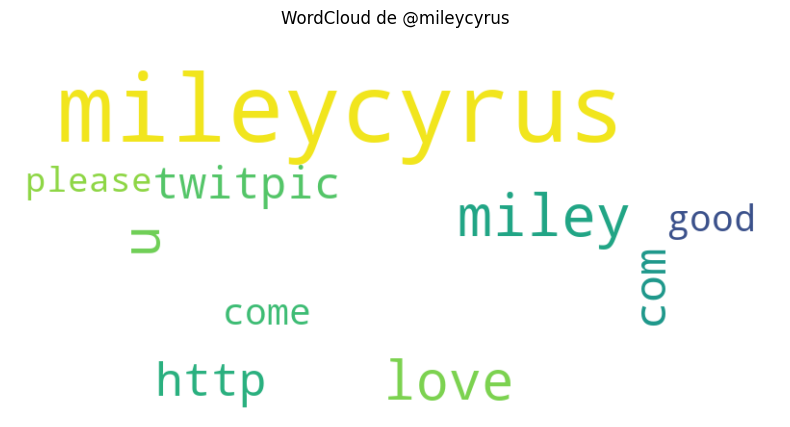

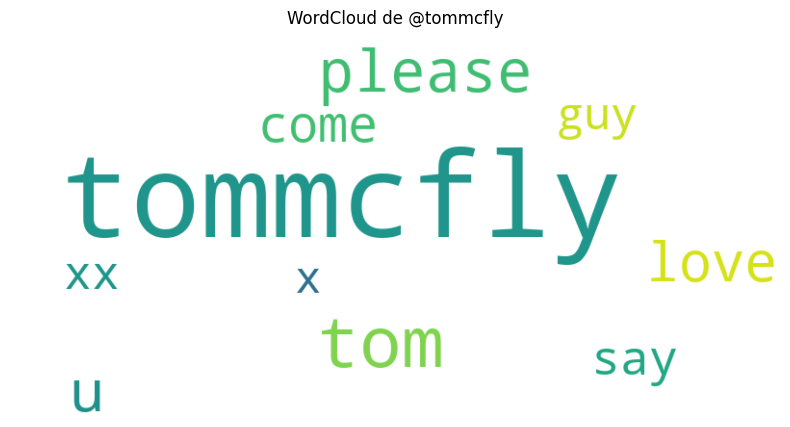

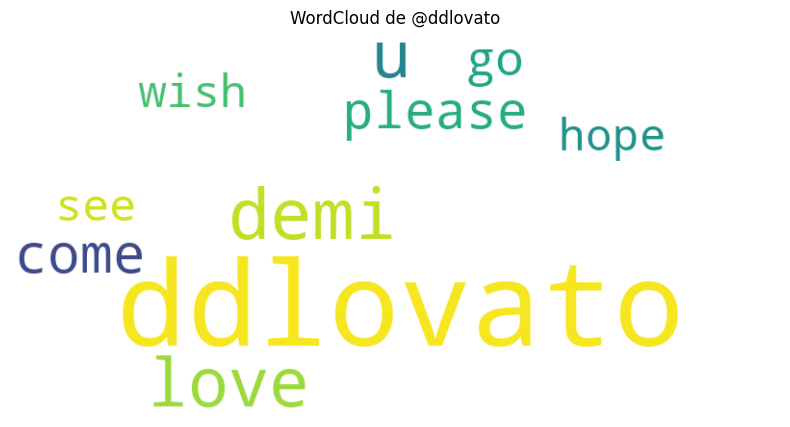

In [40]:
for user, corpus in corpus_users.items():
    plot_wordcloud_top(corpus, user)